C:\Users\Asus\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Apriori Execution Time: 0.0156 sec
FP-Growth Execution Time: 1.7068 sec


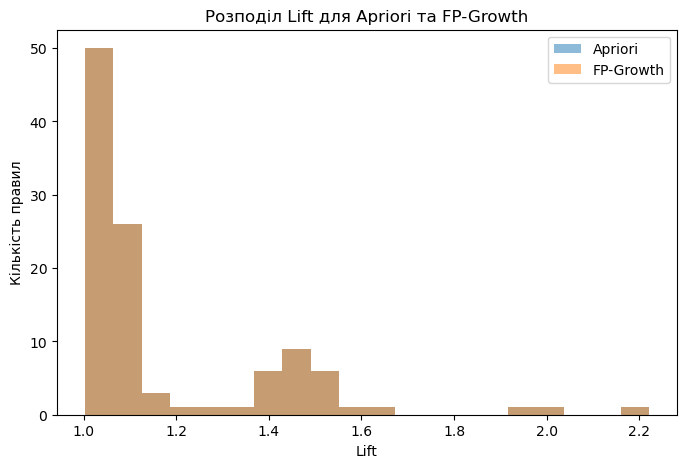

Граф для Apriori


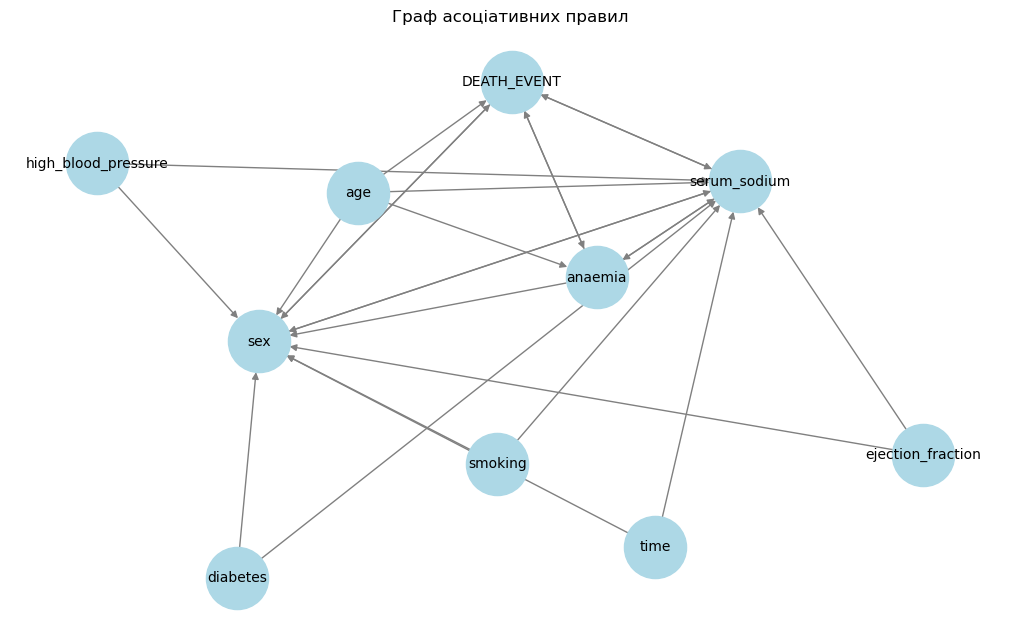

Граф для FP-Growth


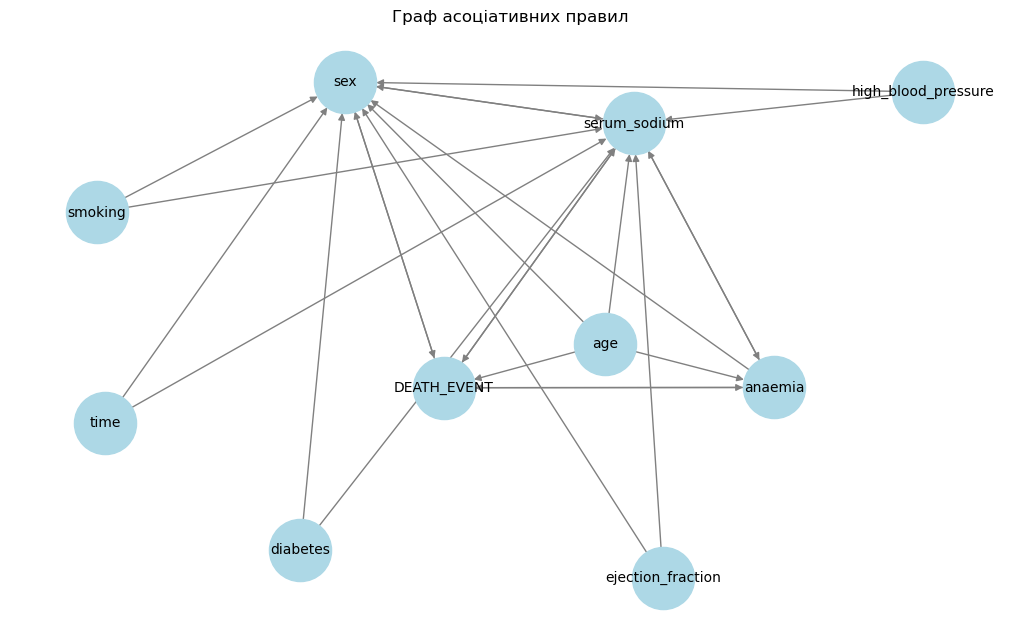

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import networkx as nx
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

# Завантаження датасету
df = pd.read_csv('clinicHeart.csv')
df.fillna(0, inplace=True)

# Перетворення числових даних у бінарний формат
df_bin = df.copy()
for col in df_bin.columns:
    if df_bin[col].nunique() > 2:
        df_bin[col] = pd.cut(df_bin[col], bins=2, labels=[0, 1], duplicates='drop')
df_bin = df_bin.astype(bool).astype(int)

# APRIORI
start = time.time()
frequent_itemsets_apriori = apriori(df_bin, min_support=0.05, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.5)
end = time.time()
print(f"Apriori Execution Time: {end - start:.4f} sec")

# FP-Growth
start = time.time()
frequent_itemsets_fpgrowth = fpgrowth(df_bin, min_support=0.05, use_colnames=True)
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=0.5)
end = time.time()
print(f"FP-Growth Execution Time: {end - start:.4f} sec")

# Фільтрація надлишкових правил
def filter_rules(rules):
    return rules[(rules['lift'] > 1) & (rules['confidence'] > 0.6)]

rules_apriori = filter_rules(rules_apriori)
rules_fpgrowth = filter_rules(rules_fpgrowth)

# Візуалізація
plt.figure(figsize=(8, 5))
plt.hist(rules_apriori['lift'], bins=20, alpha=0.5, label='Apriori')
plt.hist(rules_fpgrowth['lift'], bins=20, alpha=0.5, label='FP-Growth')
plt.xlabel('Lift')
plt.ylabel('Кількість правил')
plt.legend()
plt.title('Розподіл Lift для Apriori та FP-Growth')
plt.show()

# Візуалізація графу правил
def draw_rules_graph(rules):
    G = nx.DiGraph()
    for _, row in rules.iterrows():
        for antecedent in row['antecedents']:
            for consequent in row['consequents']:
                G.add_edge(antecedent, consequent, weight=row['lift'])
    
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
    plt.title('Граф асоціативних правил')
    plt.show()

print("Граф для Apriori")
draw_rules_graph(rules_apriori)

print("Граф для FP-Growth")
draw_rules_graph(rules_fpgrowth)
